In [2]:

import os
import matplotlib.pyplot as plt
from dataset import Dataset, Dataloder, get_augmentation, get_preprocessing
import cnn_models as sm
from cnn_models import Unet

root_dir   = os.path.abspath('..')
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

dataset_name = 'bead'
valid_dim    = 128
backbone     = 'efficientnetb0'
output_channels = 1
model           = Unet(backbone, encoder_weights='imagenet', classes= 1, activation='relu')           # model: U-net + EfficientNet
weight_file     = os.path.join(root_dir + '/results', f'{dataset_name}_dim-{valid_dim}_{backbone}', 'model.h5')
print(weight_file)
model.load_weights(weight_file)

(None, None, None, 672) (None, None, None, 1280)
(None, None, None, 240) (None, None, None, 256)
(None, None, None, 144) (None, None, None, 128)
(None, None, None, 96) (None, None, None, 64)
/home/shenghua/artificial_confocal/results/bead_dim-128_efficientnetb0/model.h5


In [3]:
# date loaders
scale = 100.    # used in the model training
dataset_dir  = os.path.join(root_dir, f'dataset/{dataset_name}') 
preprocess_input = sm.get_preprocessing(backbone)     # preprocessing configuration
valid_dataset    = Dataset(dataset_dir,   'valid.txt',
                        z_range       = [0, 255],
                        scale         = scale,
                        augmentation  = get_augmentation(dim = 128, 
                                                         is_train = False),
                        preprocessing = get_preprocessing(preprocess_input))
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)

/home/shenghua/miniconda3/envs/tf-eunet/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:2029: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


2023-03-26 01:59:59.775949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-03-26 02:00:01.019936: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


phase val range: -0.2264491766691208, 2.444680690765381
gt val range: 0.401176780462265,81.86680603027344
gt val range: 0.22539152204990387,99.93714141845703


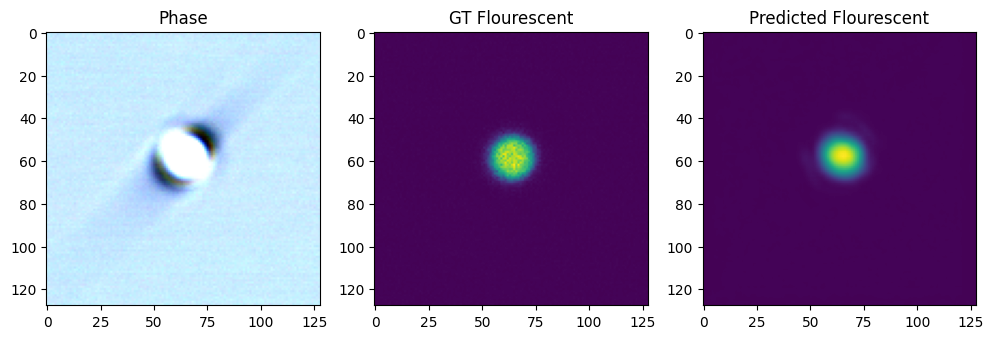

In [4]:
sample_index = len(valid_dataloader) // 2
valid_sample = valid_dataloader[sample_index]
phase = valid_sample[0]
gt_fl = valid_sample[1].squeeze() / scale
pr_fl = model.predict(phase).squeeze() / scale

fig  = plt.figure(figsize = (12, 4))
ax   = fig.add_subplot(1, 3, 1)
bx   = fig.add_subplot(1, 3, 2)
cx   = fig.add_subplot(1, 3, 3)
ax.imshow(phase.squeeze())
ax.set_title('Phase')
bx.imshow(gt_fl)
bx.set_title('GT Flourescent')
cx.imshow(pr_fl)
cx.set_title('Predicted Flourescent')
print(f'phase val range: {phase.min()}, {phase.max()}')
print(f'gt val range: {gt_fl.min()},{gt_fl.max()}')
print(f'gt val range: {pr_fl.min()},{pr_fl.max()}')